In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import dcor
import shap

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('PtPdAuIr_tafel.csv')
unwanted_columns = ['Run #', 'Sample #', 'iR drop (Ω)', 'overP0']
df = df.drop(unwanted_columns, axis=1)
print(df)

selected_columns_X = ['Pt', 'Pd', 'Au', 'Ir']
X = df[selected_columns_X]
selected_columns_y = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
y = df[selected_columns_y]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


         Pt      Pd      Au      Ir  Oonset  Omax  Omin  Tafel slope
0    0.3194  0.3605  0.2653  0.0549    1.17  1.26  1.41         5.56
1    0.2331  0.3578  0.3196  0.0895    1.18  1.28  1.43         5.05
2    0.1772  0.3511  0.3343  0.1374    1.19  1.34  1.44         4.00
3    0.1396  0.3413  0.3158  0.2032    1.20  1.34  1.46         3.70
4    0.1026  0.3213  0.2827  0.2934    1.20  1.35  1.48         3.34
..      ...     ...     ...     ...     ...   ...   ...          ...
102  0.1330  0.0667  0.6788  0.1215    1.27  1.36  1.46         5.82
103  0.0874  0.0536  0.6995  0.1595    1.23  1.36  1.51         4.31
104  0.0609  0.0549  0.6538  0.2304    1.24  1.37  1.48         5.62
105  0.0507  0.0578  0.5548  0.3367    1.20  1.37  1.52         4.19
106  0.4490  0.0801  0.4301  0.0408    1.19  1.27  1.41         4.67

[107 rows x 8 columns]


In [2]:
#Test ML models
linear=0; rf=0; dt=0; knn=0; svr=0; gb=0; ab = 0;
#n-fold mse
n = 20
for i in range (0,n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create a multioutput regression model
    modelLinear = MultiOutputRegressor(LinearRegression())
    modelLinear.fit(X_train, y_train)
    predictions = modelLinear.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    linear+= mse
    #print(f'Mean Squared Error (Linear): {mse}')

    # Create a multioutput regression model
    modelRF = MultiOutputRegressor(RandomForestRegressor())
    modelRF.fit(X_train, y_train)
    predictions = modelRF.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    rf+=mse
    #print(f'Mean Squared Error (RF): {mse}')

    # Create a multioutput regression model
    modelDT = MultiOutputRegressor(DecisionTreeRegressor())
    modelDT.fit(X_train, y_train)
    predictions = modelDT.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    dt+=mse
    #print(f'Mean Squared Error (DT): {mse}')

    # Create a multioutput regression model
    modelKNN = MultiOutputRegressor(KNeighborsRegressor())
    modelKNN.fit(X_train, y_train)
    predictions = modelKNN.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    knn+=mse
    #print(f'Mean Squared Error (KNN): {mse}')

    # Create a multioutput regression model
    modelSVR = MultiOutputRegressor(SVR())
    modelSVR.fit(X_train, y_train)
    predictions = modelSVR.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    svr+=mse
    #print(f'Mean Squared Error (SVR): {mse}')

    # Create a multioutput regression model
    modelGB = MultiOutputRegressor(GradientBoostingRegressor())
    modelGB.fit(X_train, y_train)
    predictions = modelGB.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    gb+=mse
    #print(f'Mean Squared Error (GB): {mse}')

    # Create a multioutput regression model
    modelAB = MultiOutputRegressor(AdaBoostRegressor())
    modelAB.fit(X_train, y_train)
    predictions = modelAB.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    ab+=mse
    #print(f'Mean Squared Error (AB): {mse}')
    
print("Lower error means a better fit.")
print(f'Mean Squared Error (Linear): {linear/n}')
print(f'Mean Squared Error (RF): {rf/n}')
print(f'Mean Squared Error (DT): {dt/n}')
print(f'Mean Squared Error (KNN): {knn/n}')
print(f'Mean Squared Error (SVR): {svr/n}')
print(f'Mean Squared Error (GB): {gb/n}')
print(f'Mean Squared Error (AB): {ab/n}')

Lower error means a better fit.
Mean Squared Error (Linear): 0.5600871031398413
Mean Squared Error (RF): 0.21467661896022738
Mean Squared Error (DT): 0.34243636363636354
Mean Squared Error (KNN): 0.23087272499999995
Mean Squared Error (SVR): 0.18664195911652692
Mean Squared Error (GB): 0.2362496575033027
Mean Squared Error (AB): 0.2086620009488652


In [3]:
#Linear Correlation analysis (Pearson)
'''Positive values indicate a positive correlation, negative values indicate a negative correlation, 
and values close to zero indicate low correlation.'''
df = pd.concat([X, y], axis=1)
#.T to ensure that the correlation is calculated between the columns (features) instead of rows.
'''Extracts the correlations between features and targets. Assuming 'y' is a 2D array or DataFrame
representing target variables, y.shape[1] gives the number of target variables. The indexing -y.shape[1]:
refers to the last rows of the correlation matrix, corresponding to the targets, and :-y.shape[1]
refers to all columns except the last ones, which correspond to the features.'''
correlation_matrix = np.corrcoef(df.values.T)
#linear corrcoef
'''    1 indicates a perfect positive linear correlation,
    0 indicates no linear correlation (independence),
    -1 indicates a perfect negative linear correlation.'''
correlations_with_targets = correlation_matrix[-y.shape[1]:, :-y.shape[1]]
results_df = pd.DataFrame({'Feature': X.columns})
for i in range(y.shape[1]):
    results_df[f'Correlation with Target{i+1}'] = correlations_with_targets[i]

print(results_df)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
  Feature  Correlation with Target1  Correlation with Target2  \
0      Pt                 -0.447073                 -0.861171   
1      Pd                 -0.464639                 -0.136397   
2      Au                  0.765413                  0.549437   
3      Ir                  0.129817                  0.656766   

   Correlation with Target3  Correlation with Target4  
0                 -0.830376                  0.274732  
1                  0.070076                 -0.141279  
2                  0.265385                  0.194680  
3                  0.761319                 -0.465791  


In [4]:
#Distance correlation, to capture any nonlinear correlations
features = X.values
targets = y.values

# Compute distance correlation between each feature and each target
for i in range(features.shape[1]):
    for j in range(targets.shape[1]):
        dcorr = dcor.distance_correlation(features[:, i], targets[:, j])
        print(f"Distance correlation between feature {i+1} and target {j+1}: {dcorr}")

Distance correlation between feature 1 and target 1: 0.4801069347164212
Distance correlation between feature 1 and target 2: 0.8642400092323147
Distance correlation between feature 1 and target 3: 0.8692286413841334
Distance correlation between feature 1 and target 4: 0.31086423628817733
Distance correlation between feature 2 and target 1: 0.4680171040991122
Distance correlation between feature 2 and target 2: 0.19269692923444112
Distance correlation between feature 2 and target 3: 0.15800225860558093
Distance correlation between feature 2 and target 4: 0.22236960043796994
Distance correlation between feature 3 and target 1: 0.7594663009259939
Distance correlation between feature 3 and target 2: 0.5558873160336948
Distance correlation between feature 3 and target 3: 0.37929715266055136
Distance correlation between feature 3 and target 4: 0.30397743507068453
Distance correlation between feature 4 and target 1: 0.40905757771191964
Distance correlation between feature 4 and target 2: 0.72

In [5]:
#Distance correlation with over-potential
df_OP = pd.read_csv('PtPdAuIr_tafel.csv')
unwanted_columns_OP = ['Pt', 'Pd', 'Au', 'Ir', 'Run #', 'Sample #', 'iR drop (Ω)']
df_OP = df_OP.drop(unwanted_columns_OP, axis=1)
df_OP.dropna(inplace=True)
print(df_OP)

selected_columns_X = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
X_OP = df_OP[selected_columns_X]
selected_columns_y = ['overP0']
y_OP = df_OP[selected_columns_y]

#Distance correlation, to capture any nonlinear correlations
featureO = X_OP.values
targetOP = y_OP.values

# Compute distance correlation between each feature and each target
for i in range(featureO.shape[1]):
    dcorr = dcor.distance_correlation(featureO[:, i], targetOP)
    print(f"Distance correlation between Tafel feature {i+1} and over-potential: {dcorr}")

     Oonset  Omax  Omin  Tafel slope    overP0
0      1.17  1.26  1.41         5.56  0.651685
1      1.18  1.28  1.43         5.05  0.612874
2      1.19  1.34  1.44         4.00  0.566532
3      1.20  1.34  1.46         3.70  0.547118
4      1.20  1.35  1.48         3.34  0.516503
..      ...   ...   ...          ...       ...
102    1.27  1.36  1.46         5.82  0.727464
103    1.23  1.36  1.51         4.31  0.580117
104    1.24  1.37  1.48         5.62  0.611273
105    1.20  1.37  1.52         4.19  0.603785
106    1.19  1.27  1.41         4.67  0.747826

[99 rows x 5 columns]
Distance correlation between Tafel feature 1 and over-potential: 0.2879040988187854
Distance correlation between Tafel feature 2 and over-potential: 0.47274618164309484
Distance correlation between Tafel feature 3 and over-potential: 0.6639515527149749
Distance correlation between Tafel feature 4 and over-potential: 0.46212155023510404


RandomForestRegressor


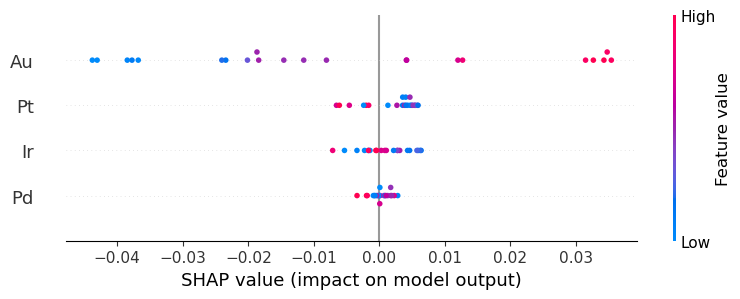

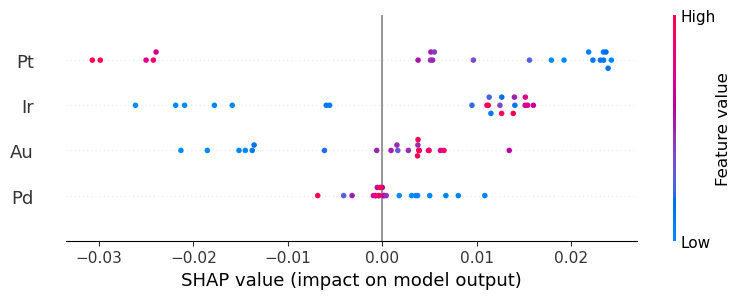

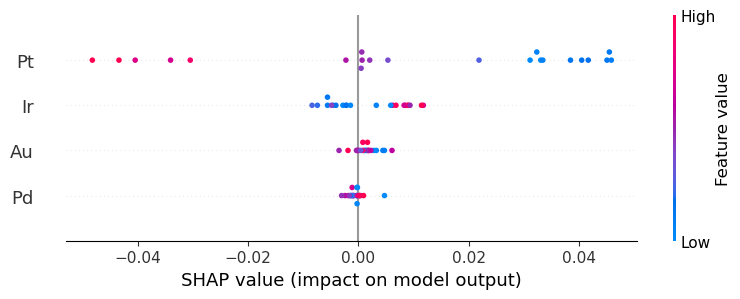

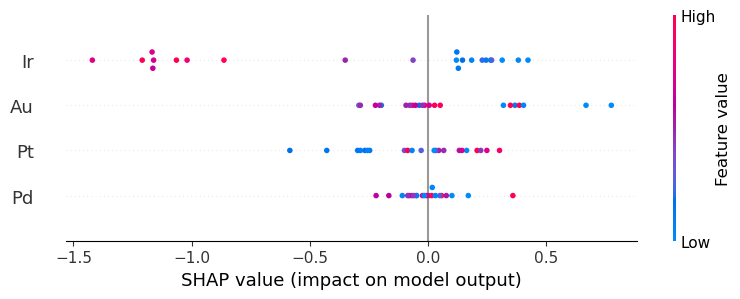

In [6]:
#SHAP Values (SHapley Additive exPlanations)
#We examine each target separately.
'''    Positive SHAP Values:
        Positive SHAP values indicate that the feature value is pushing the model's prediction higher.
        The larger the positive SHAP value, the more the feature contributes to increasing the prediction.

    Negative SHAP Values:
        Negative SHAP values indicate that the feature value is pushing the model's prediction lower.
        The larger the negative SHAP value, the more the feature contributes to decreasing the prediction.
        (For example, if the feature represents a factor associated with lower prices in a pricing model, a
        negative SHAP value indicates that higher values of that feature are associated with lower predicted prices.)

    Magnitude of SHAP Values:
        The magnitude of the SHAP value indicates the strength of the feature's influence on the prediction.
        Features with larger SHAP values have a greater impact on the model's prediction.

    Relative Importance:
        Comparing SHAP values across different features can help determine the relative importance of each feature.
        Features with larger absolute SHAP values are more influential in determining the model's predictions.

    Interactions:
        SHAP values can also reveal interactions between features.
        If the SHAP value of one feature varies depending on the value of another feature, it suggests an interaction between the two features.

    Baseline Value:
        SHAP values are interpreted relative to a baseline value, which is usually the mean prediction of the model.
        Positive SHAP values indicate that the feature value increases the prediction relative to the baseline, while negative SHAP values indicate a decrease relative to the baseline.

    Overall Model Behavior:
        Analyzing SHAP values across multiple instances can provide insights into the overall behavior of the model.
        Aggregating SHAP values across a dataset can reveal which features consistently contribute to higher or lower predictions.'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("RandomForestRegressor")
for i in range(0, len(y_train.columns)):
    model = RandomForestRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

DecisionTreeRegressor


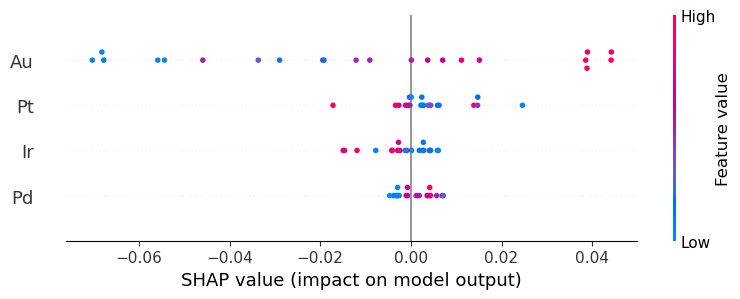

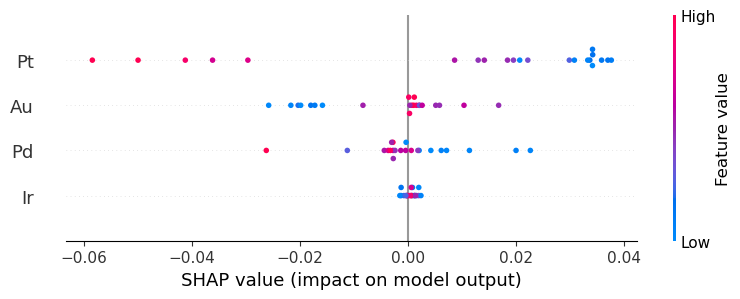

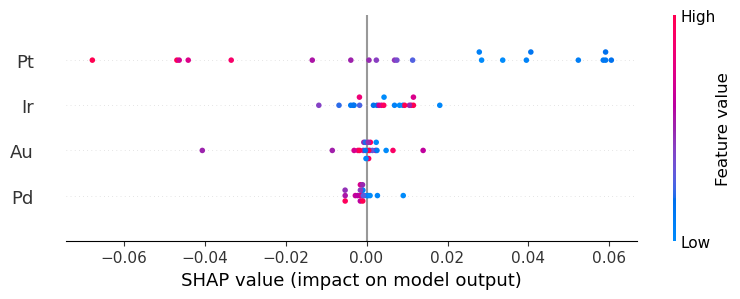

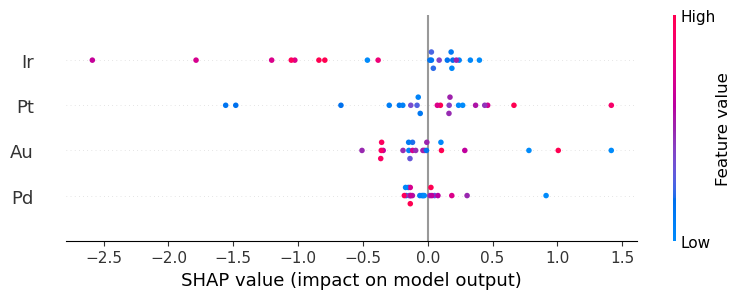

In [7]:
print("DecisionTreeRegressor")
for i in range(0, len(y_train.columns)):
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

GradientBoostingRegressor


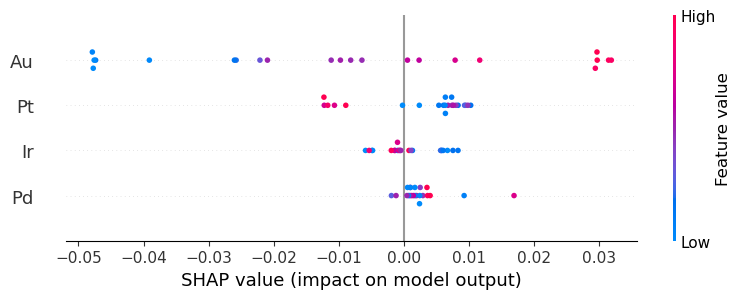

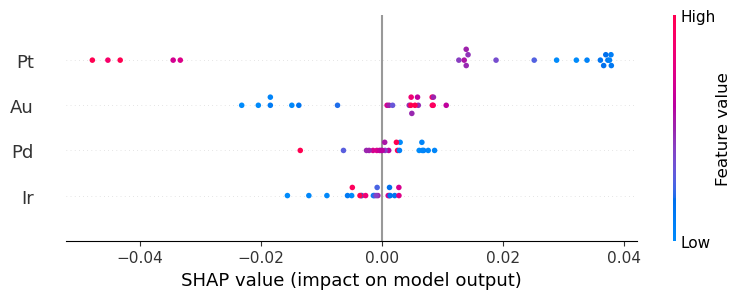

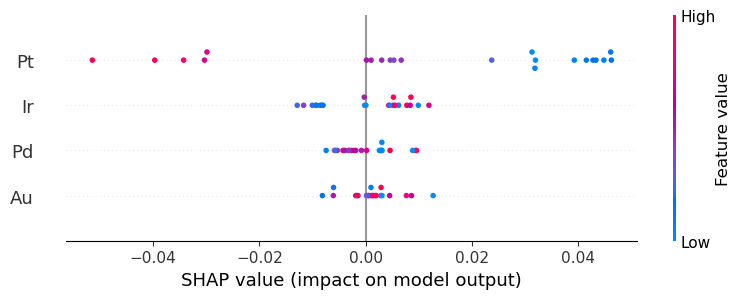

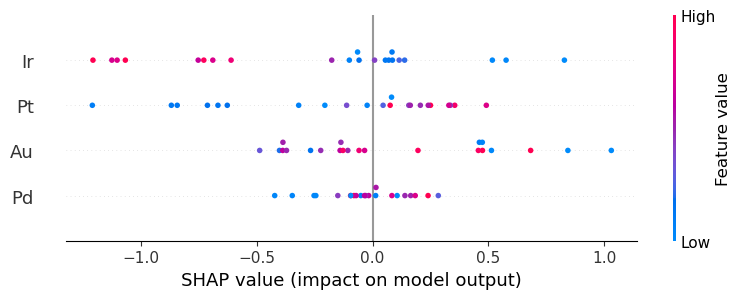

In [8]:
print("GradientBoostingRegressor")
for i in range(0, len(y_train.columns)):
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]
     Oonset    Omax  Tafel slope
0    1.2265  1.3647       4.5752
1    1.1639  1.2883       5.6509
2    1.1973  1.3650       2.6142
3    1.1847  1.3293       2.6156
4    1.1915  1.2952       4.4309
..      ...     ...          ...
995  1.1982  1.3650       2.5356
996  1.2270  1.3113       4.4517
997  1.1573  1.2425       4.9815
998  1.1946  1.3403       3.7043
999  1.1526  1.2362       5.2496

[1000 rows x 3 columns]


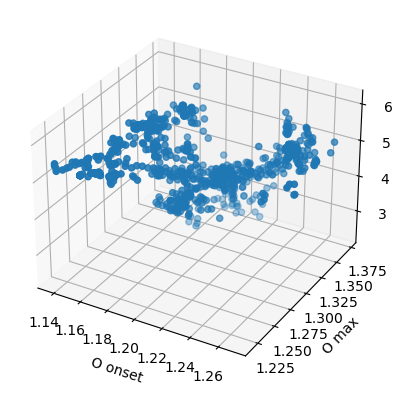

In [9]:
#Random values to determine physical-ness of predictions
np.random.seed(0)
n = 1000
col1 = np.random.rand(n) #rng (0,1)
col2 = np.random.rand(n)*(1-col1)
col3 = np.random.rand(n)*(1-(col1+col2))
col4 = 1-(col1+col2+col3)
data = np.column_stack((col1, col2, col3, col4))
data_test = pd.DataFrame(data)
for index, row in data_test.iterrows():
    data_test.loc[index] = np.random.permutation(row)
data_test.columns = ['Pt', 'Pd', 'Au', 'Ir']
print(data_test)
#print(data_test.sum(axis=1))

modelRF = MultiOutputRegressor(RandomForestRegressor())
modelRF.fit(X, y) # fit on full set of real data
predictions = modelRF.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.show()

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]
     Oonset   Omax  Tafel slope
0     1.195  1.295     4.358764
1     1.195  1.295     4.615489
2     1.195  1.295     3.639378
3     1.195  1.295     4.189027
4     1.195  1.295     4.734874
..      ...    ...          ...
995   1.195  1.295     4.151583
996   1.195  1.295     4.486082
997   1.195  1.295     4.813762
998   1.195  1.295     3.512718
999   1.195  1.295     5.430519

[1000 rows x 3 columns]


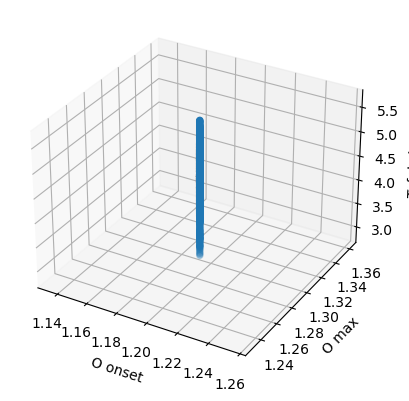

In [10]:
#NOTE: this indicates that the targets Oonset, Omax and Omin do not have enough variance to use SVR
#as a prediction model, despite the fact that it performs well.
print(data_test)

modelSVR = MultiOutputRegressor(SVR())
modelSVR.fit(X, y) # fit on full set of real data
predictions = modelSVR.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.show()

           Pt        Pd        Au        Ir
0    0.034622  0.149065  0.548814  0.267500
1    0.134229  0.715189  0.147715  0.002866
2    0.099289  0.189016  0.108932  0.602763
3    0.099339  0.544883  0.033205  0.322573
4    0.217621  0.423655  0.333379  0.025345
..        ...       ...       ...       ...
995  0.097676  0.177349  0.010982  0.713992
996  0.349837  0.061381  0.514922  0.073859
997  0.938412  0.021657  0.010362  0.029569
998  0.223486  0.051220  0.228647  0.496647
999  0.677141  0.112182  0.162002  0.048675

[1000 rows x 4 columns]
       Oonset      Omax  Tafel slope
0    1.225679  1.362848     5.026545
1    1.159322  1.278312     5.363034
2    1.186818  1.362096     2.680063
3    1.183084  1.307216     2.679949
4    1.189547  1.282953     4.343343
..        ...       ...          ...
995  1.186818  1.362096     2.451855
996  1.195733  1.301684     4.245619
997  1.145640  1.237725     4.696495
998  1.189902  1.341648     3.809241
999  1.136302  1.222010     5.759340

[1

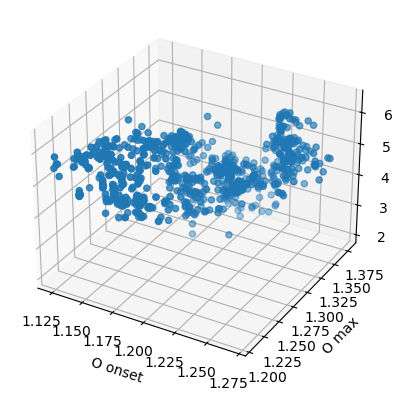

In [11]:
print(data_test)

modelGB = MultiOutputRegressor(GradientBoostingRegressor())
modelGB.fit(X, y) # fit on full set of real data
predictions = modelGB.predict(data_test)
data_predictions = pd.DataFrame(predictions)
data_predictions.columns = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
data_predictions = data_predictions.drop('Omin', axis=1)
print(data_predictions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_predictions['Oonset'], data_predictions['Omax'], data_predictions['Tafel slope'])
ax.set_xlabel('O onset')
ax.set_ylabel('O max')
ax.set_zlabel('Tafel slope')
plt.show()

In [14]:
#Tafel plot to Overpotential relationships
df = pd.read_csv('PtPdAuIr_tafel.csv')
unwanted_columns = ['Run #', 'Sample #', 'iR drop (Ω)','Pt', 'Pd', 'Au', 'Ir']
df = df.drop(unwanted_columns, axis=1)
df = df.dropna()
print(df)

selected_columns_X = ['Oonset', 'Omax', 'Omin', 'Tafel slope']
X = df[selected_columns_X]
selected_columns_y = ['overP0']
y = df[selected_columns_y]

     Oonset  Omax  Omin  Tafel slope    overP0
0      1.17  1.26  1.41         5.56  0.651685
1      1.18  1.28  1.43         5.05  0.612874
2      1.19  1.34  1.44         4.00  0.566532
3      1.20  1.34  1.46         3.70  0.547118
4      1.20  1.35  1.48         3.34  0.516503
..      ...   ...   ...          ...       ...
102    1.27  1.36  1.46         5.82  0.727464
103    1.23  1.36  1.51         4.31  0.580117
104    1.24  1.37  1.48         5.62  0.611273
105    1.20  1.37  1.52         4.19  0.603785
106    1.19  1.27  1.41         4.67  0.747826

[99 rows x 5 columns]


In [15]:
#Test ML models for Tafel to Overpotential relationship
linear=0; rf=0; dt=0; knn=0; svr=0; gb=0; ab = 0;
#n-fold mse
n = 20
for i in range (0,n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Create a multioutput regression model
    modelLinear = MultiOutputRegressor(LinearRegression())
    modelLinear.fit(X_train, y_train)
    predictions = modelLinear.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    linear+= mse
    #print(f'Mean Squared Error (Linear): {mse}')

    # Create a multioutput regression model
    modelRF = MultiOutputRegressor(RandomForestRegressor())
    modelRF.fit(X_train, y_train)
    predictions = modelRF.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    rf+=mse
    #print(f'Mean Squared Error (RF): {mse}')

    # Create a multioutput regression model
    modelDT = MultiOutputRegressor(DecisionTreeRegressor())
    modelDT.fit(X_train, y_train)
    predictions = modelDT.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    dt+=mse
    #print(f'Mean Squared Error (DT): {mse}')

    # Create a multioutput regression model
    modelKNN = MultiOutputRegressor(KNeighborsRegressor())
    modelKNN.fit(X_train, y_train)
    predictions = modelKNN.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    knn+=mse
    #print(f'Mean Squared Error (KNN): {mse}')

    # Create a multioutput regression model
    modelSVR = MultiOutputRegressor(SVR())
    modelSVR.fit(X_train, y_train)
    predictions = modelSVR.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    svr+=mse
    #print(f'Mean Squared Error (SVR): {mse}')

    # Create a multioutput regression model
    modelGB = MultiOutputRegressor(GradientBoostingRegressor())
    modelGB.fit(X_train, y_train)
    predictions = modelGB.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    gb+=mse
    #print(f'Mean Squared Error (GB): {mse}')

    # Create a multioutput regression model
    modelAB = MultiOutputRegressor(AdaBoostRegressor())
    modelAB.fit(X_train, y_train)
    predictions = modelAB.predict(X_test)
    # Evaluate the performance
    mse = mean_squared_error(y_test, predictions)
    ab+=mse
    #print(f'Mean Squared Error (AB): {mse}')

print("Tafel to Overpotential relationship.")
print("Lower error means a better fit.")
print(f'Mean Squared Error (Linear): {linear/n}')
print(f'Mean Squared Error (RF): {rf/n}')
print(f'Mean Squared Error (DT): {dt/n}')
print(f'Mean Squared Error (KNN): {knn/n}')
print(f'Mean Squared Error (SVR): {svr/n}')
print(f'Mean Squared Error (GB): {gb/n}')
print(f'Mean Squared Error (AB): {ab/n}')

Tafel to Overpotential relationship.
Lower error means a better fit.
Mean Squared Error (Linear): 0.0016654018209092784
Mean Squared Error (RF): 0.0021710697535462825
Mean Squared Error (DT): 0.003323050245266425
Mean Squared Error (KNN): 0.004251521386773019
Mean Squared Error (SVR): 0.003880710742013265
Mean Squared Error (GB): 0.001992555686653131
Mean Squared Error (AB): 0.0020210582658087032


In [19]:
#Linear Correlation analysis (Pearson) for Tafel to Overpotential
'''Positive values indicate a positive correlation, negative values indicate a negative correlation, 
and values close to zero indicate low correlation.'''
df = pd.concat([X, y], axis=1)
#.T to ensure that the correlation is calculated between the columns (features) instead of rows.
'''Extracts the correlations between features and targets. Assuming 'y' is a 2D array or DataFrame
representing target variables, y.shape[1] gives the number of target variables. The indexing -y.shape[1]:
refers to the last rows of the correlation matrix, corresponding to the targets, and :-y.shape[1]
refers to all columns except the last ones, which correspond to the features.'''
correlation_matrix = np.corrcoef(df.values.T)
#linear corrcoef
'''    1 indicates a perfect positive linear correlation,
    0 indicates no linear correlation (independence),
    -1 indicates a perfect negative linear correlation.'''
correlations_with_targets = correlation_matrix[-y.shape[1]:, :-y.shape[1]]
results_df = pd.DataFrame({'Feature': X.columns})
for i in range(y.shape[1]):
    results_df[f'Correlation with Target{i+1}'] = correlations_with_targets[i]

print(results_df)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
       Feature  Correlation with Target1
0       Oonset                  0.137807
1         Omax                 -0.468027
2         Omin                 -0.660156
3  Tafel slope                  0.429678


In [17]:
#Distance correlation, to capture any nonlinear correlations [Tafel to Overpotential]
features = X.values
targets = y.values

# Compute distance correlation between each feature and each target
for i in range(features.shape[1]):
    for j in range(targets.shape[1]):
        dcorr = dcor.distance_correlation(features[:, i], targets[:, j])
        print(f"Distance correlation between feature {i+1} and target {j+1}: {dcorr}")

Distance correlation between feature 1 and target 1: 0.2879040988187854
Distance correlation between feature 2 and target 1: 0.47274618164309484
Distance correlation between feature 3 and target 1: 0.6639515527149749
Distance correlation between feature 4 and target 1: 0.46212155023510404



[Tafel to Overpotential]
RandomForestRegressor


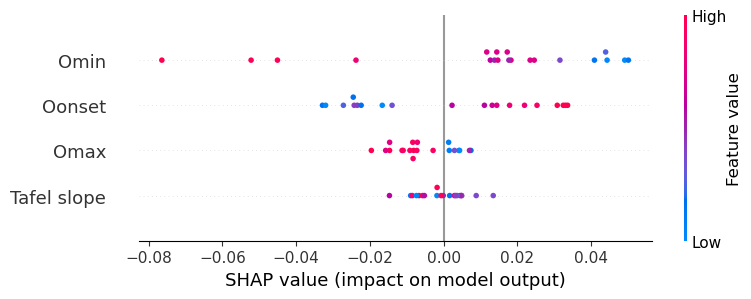

DecisionTreeRegressor


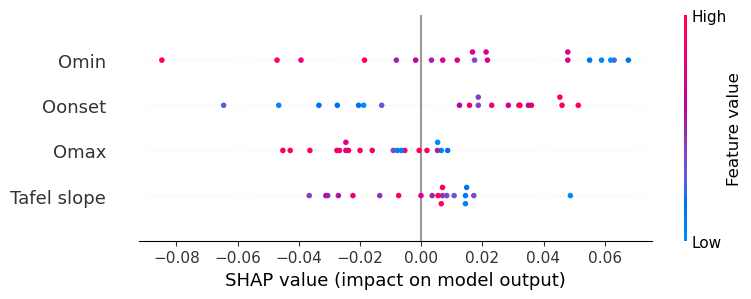

GradientBoostingRegressor


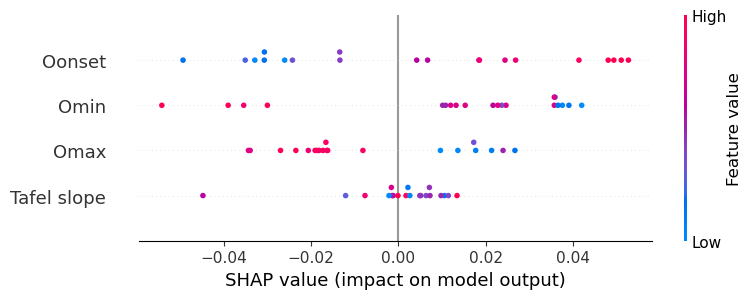

In [24]:
print("\n[Tafel to Overpotential]")
print("RandomForestRegressor")
for i in range(0, len(y_train.columns)):
    model = RandomForestRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

print("DecisionTreeRegressor")
for i in range(0, len(y_train.columns)):
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)

print("GradientBoostingRegressor")
for i in range(0, len(y_train.columns)):
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train.iloc[:,i])
    explainer = shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test)